In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Merge all old datasets into a new one

In [43]:
df=pd.read_csv(r'../../data/music_clean.csv')
# release name and song name
sentiment_df = pd.read_csv('../../data/sentiment.csv')
SVD_df = pd.read_csv('../../data/feature_extraction.csv', index_col = 0)
SVD_df.drop(['log_Y'], axis = 1, inplace = True)
# hotness
hotness1_df = pd.read_csv('../../data/hotness1.csv', header = None)
hotness1_df.columns = ['Youtube_Hotness']
hotness1_df['Youtube_Hotness'] = np.log(1e-6 + hotness1_df['Youtube_Hotness'])
# song attributes# singer attributesgrammy_df = pd.read_csv('../../data/new_data_with_grammy.csv')
grammy_df = grammy_df[['grammy_relevance']]
tweet_df = pd.read_csv('../../data/music_complete_tweet.csv')
tweet_df = tweet_df[['artist_freq']]
# country
country = pd.read_csv('../../data/million_song.csv',index_col=0)
country = pd.get_dummies(country[['country']])

In [47]:
all_data_df=pd.concat([hotness1_df,df,sentiment_df,SVD_df,grammy_df,tweet_df,country],axis=1)

In [49]:
all_data_df.to_csv('../../data/all_data.csv')

Remove attributes...

In [48]:
all_data_df = all_data_df.drop(['artist.id', 'artist.name', 'artist_mbtags', 'latitude',
                 'location', 'longitude', 'release.id', 'release.name',
                 'similar', 'song.hotttnesss', 'song.id', 'terms',
                 'title', 'year', 'mbtags_count', 'mbtag_0', 'mbtag_1', 'mbtag_2', 'similar_hotness'], axis = 1)

In [22]:
def char_to_int(char):
    try: 
        return ord(char.lower()) - 96
    except: return None

In [23]:
all_data_df['artist_firstname'] = all_data_df['artist_firstname'].apply(char_to_int)
all_data_df['artist_lastname'] = all_data_df['artist_lastname'].apply(char_to_int)

In [24]:
million_song = pd.read_csv('../../data/million_song.csv')
all_data_df = all_data_df.join(pd.get_dummies(million_song['country']))

In [25]:
all_data_df.columns

Index(['artist.hotttnesss', 'artist_mbtags_count', 'bars_confidence',
       'bars_start', 'beats_confidence', 'beats_start', 'duration',
       'end_of_fade_in', 'familiarity', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tatums_confidence',
       'tatums_start', 'tempo', 'terms_freq', 'time_signature',
       'time_signature_confidence', 'decade', 'artist_firstname',
       'artist_lastname', 'term_id', 'grammy_relevance', 'Youtube Hotness',
       'title_neg', 'title_neu', 'title_pos', 'title_compound',
       'release.name_neg', 'release.name_neu', 'release.name_pos',
       'release.name_compound', 'release_svd_1_10', 'release_svd_2_10',
       'release_svd_3_10', 'release_svd_4_10', 'release_svd_5_10',
       'release_svd_6_10', 'release_svd_7_10', 'release_svd_8_10',
       'release_svd_9_10', 'release_svd_10_10', 'title_svd_1_10',
       'title_svd_2_10', 'title_svd_3_10', 'title_svd_4_10', 'title_svd_5_10',
       'title_svd_6_1

In [25]:
all_data_df.columns

Index(['artist.hotttnesss', 'artist_mbtags_count', 'bars_confidence',
       'bars_start', 'beats_confidence', 'beats_start', 'duration',
       'end_of_fade_in', 'familiarity', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'start_of_fade_out', 'tatums_confidence',
       'tatums_start', 'tempo', 'terms_freq', 'time_signature',
       'time_signature_confidence', 'decade', 'artist_firstname',
       'artist_lastname', 'term_id', 'grammy_relevance', 'Youtube Hotness',
       'title_neg', 'title_neu', 'title_pos', 'title_compound',
       'release.name_neg', 'release.name_neu', 'release.name_pos',
       'release.name_compound', 'release_svd_1_10', 'release_svd_2_10',
       'release_svd_3_10', 'release_svd_4_10', 'release_svd_5_10',
       'release_svd_6_10', 'release_svd_7_10', 'release_svd_8_10',
       'release_svd_9_10', 'release_svd_10_10', 'title_svd_1_10',
       'title_svd_2_10', 'title_svd_3_10', 'title_svd_4_10', 'title_svd_5_10',
       'title_svd_6_1

## Data Preprocessing

In [26]:
all_data_df = all_data_df.dropna(axis = 0)

In [27]:
X = all_data_df.drop('Youtube Hotness', axis = 1)
Y = all_data_df['Youtube Hotness']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2019)

In [28]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/zheyuwu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Linear Regression

In [29]:
linearModel = LinearRegression()
linearModel.fit(X_train_scaled, y_train)
y_predict = linearModel.predict(X_test_scaled)

**Training Set Performance**

In [30]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_train, linearModel.predict(X_train_scaled))))

R-square score of Linear Regression Model is 0.1886745265450559


In [31]:
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_train, linearModel.predict(X_train_scaled))))


MSE of Linear Regression Model is 74.7718299845645


**Test Set Performance**

In [34]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_test, y_predict)))
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_test, y_predict)))

R-square score of Linear Regression Model is 0.1497044747687828
MSE of Linear Regression Model is 77.95430586067883


## kNN

In [35]:
KNNmodels = {}
k_set = [1,10,75,250,500,750,1000]

In [36]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [37]:
for k in k_set:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train_scaled, y_train)
    KNNmodels[k] = knnreg

In [38]:
for k, model in KNNmodels.items():
    y_predict = model.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, model.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, model.predict(X_train_scaled)))

**Performance**

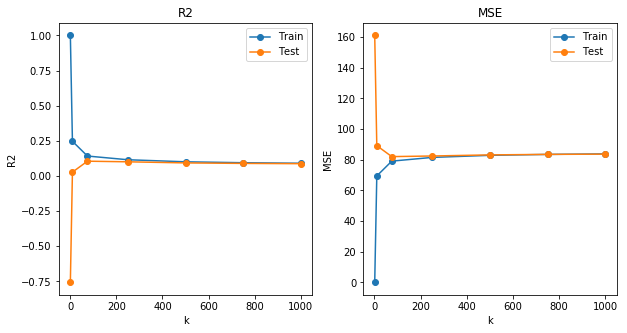

In [39]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(k_set, r2_train, marker = 'o', label = 'Train')
axes[0].plot(k_set, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('k')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(k_set, mse_train, marker = 'o', label = 'Train')
axes[1].plot(k_set, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('k')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Regression Tree

In [40]:
tree_list = []
tree_depth = [1,2,5,8,10,15,20]
for i in tree_depth:
    tree = DecisionTreeRegressor(max_depth = i)
    tree.fit(X_train_scaled, y_train)
    tree_list.append(tree)

In [41]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [42]:
for tree in tree_list:
    y_predict = tree.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, tree.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, tree.predict(X_train_scaled)))

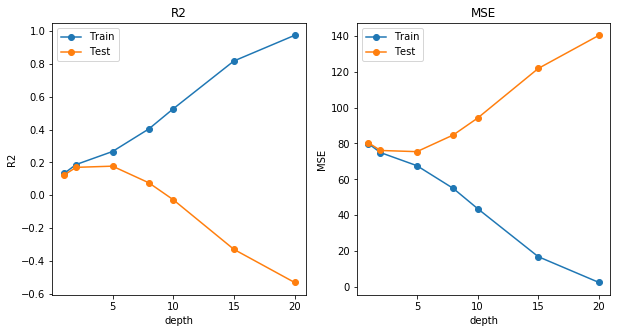

In [43]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(tree_depth, r2_train, marker = 'o', label = 'Train')
axes[0].plot(tree_depth, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('depth')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(tree_depth, mse_train, marker = 'o', label = 'Train')
axes[1].plot(tree_depth, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('depth')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Random Forest for Regression

In [44]:
forest_list = []
forest_depth = [1,2,5,8,10,15,20]
for i in tree_depth:
    forest = RandomForestRegressor(max_depth = i, n_estimators=10)
    forest.fit(X_train_scaled, y_train)
    forest_list.append(forest)

In [45]:
r2_test = []
r2_train = []
mse_test = []
mse_train = []

In [46]:
for forest in forest_list:
    y_predict = forest.predict(X_test_scaled)
    
    r2_test.append(r2_score(y_test, y_predict))
    r2_train.append(r2_score(y_train, forest.predict(X_train_scaled)))
    mse_test.append(mean_squared_error(y_test, y_predict))
    mse_train.append(mean_squared_error(y_train, forest.predict(X_train_scaled)))

**Performance**

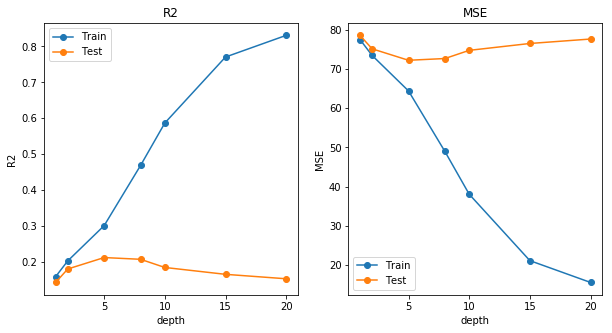

In [47]:
fig, axes = plt.subplots(1,2, figsize = (10, 5))
axes[0].plot(forest_depth, r2_train, marker = 'o', label = 'Train')
axes[0].plot(forest_depth, r2_test, marker = 'o', label = 'Test')
axes[0].set_title('R2')
axes[0].set_xlabel('depth')
axes[0].set_ylabel('R2')
axes[0].legend()
axes[1].plot(forest_depth, mse_train, marker = 'o', label = 'Train')
axes[1].plot(forest_depth, mse_test, marker = 'o', label = 'Test')
axes[1].set_title('MSE')
axes[1].set_xlabel('depth')
axes[1].set_ylabel('MSE')
axes[1].legend();

## Neural Network

In [48]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [53]:
H = 100
input_dim = 55
drop_out_rate = 0.2
batch_size = 128

In [54]:
multi_layer_model = Sequential()

multi_layer_model.add(Dense(H, input_dim=input_dim,  activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(H, activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(H, activation='relu'))
multi_layer_model.add(Dropout(drop_out_rate))
multi_layer_model.add(Dense(1, activation='linear'))  

multi_layer_model.compile(loss='mean_squared_error', optimizer='sgd')

In [55]:
multi_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               5600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total para

In [56]:
multi_layer_model.fit(X_train_scaled, y_train, batch_size=batch_size, verbose = 1)

Epoch 1/1
6995/6995 [==============================] - 0s 43us/step - loss: 94.9988


**Training Set Performance**

In [57]:
print ('R-square score of MLP Model is {}'.format(r2_score(y_train, multi_layer_model.predict(X_train_scaled))))
print ('MSE of MLP is {}'.format(mean_squared_error(y_train, multi_layer_model.predict(X_train_scaled))))

R-square score of MLP Model is 0.03078769568094375
MSE of MLP is 89.32269478596247


**Test Set Performance**

In [58]:
y_predict = multi_layer_model.predict(X_test_scaled)

In [59]:
print ('R-square score of Linear Regression Model is {}'.format(r2_score(y_test, y_predict)))
print ('MSE of Linear Regression Model is {}'.format(mean_squared_error(y_test, y_predict)))

R-square score of Linear Regression Model is 0.03292857891352985
MSE of Linear Regression Model is 88.6602117869505
